In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

Data is saved in JSON files. Each key/value pair represents one sample.

In [2]:
with open('../data/subject_testSubject_data.json', 'r') as f:
    data = json.load(f)

Take a look at how many samples we have

In [3]:
len(data.values())

3111

## Extract the data of interest

When loaded into Python, the data takes the form of a dictionary. The keys are mostly meaningless, so we can just extract the values. These are stored as JSON strings themselves, so we need to use `json.loads()` to conver them to Python dictionaries.

We end up with a list of dictionaries, with each item representing a single sample.

In [4]:
sample_data = []
for v in data.values():
    sample_data.append(json.loads(v))

This is what the first sample looks like

In [5]:
sample_data[0]

{'score': 4490,
 'health': 0.6322000000000169,
 'currentTime': '2020-09-14T02:52:23.479Z',
 'yPos': 156.9770662443788,
 'upKeyPressed': False,
 'downKeyPressed': False,
 'asteroidsPresent': False,
 'currentTrial': 7}

We can then turn this into a Pandas dataframe.

The data recorded represents the current time, to the nearest millisecond, (`currentTime`), the position of the spaceship (`yPos`), whether the up key is pressed (`upKeyPressed`), whether the down key is pressed (`upKeyPressed`), whether the asteroid belt is on screen (`asteroidsPresent`) the current trial number (`currentTrial`), and the spaceship health (`health`).

In [6]:
df = pd.DataFrame(sample_data)
df.head()

,score,health,currentTime,yPos,upKeyPressed,downKeyPressed,asteroidsPresent,currentTrial
0,4490,0.63220,2020-09-14T02:52:23.479Z,156.977066,False,False,False,7
1,2570,0.89384,2020-09-14T02:52:04.247Z,43.675449,False,True,False,4
2,6200,0.60544,2020-09-14T02:52:40.610Z,14.000000,False,False,False,9
3,1700,0.93192,2020-09-14T02:51:55.640Z,253.316090,False,False,False,2
4,5500,0.70480,2020-09-14T02:52:33.571Z,297.300138,True,False,True,8


Note that because the data is stored in JSON format (where the entries have no order), the rows are out of order. We can use the `currentTime` column to put them in the correct order.

The time is given at UTC+00 (it's surprisingly awkward to get a nicely formatted time string in the current time zone from javascript).

In [7]:
df['currentTime'] = pd.to_datetime(df['currentTime'])  # Make sure this column is the right format
df = df.sort_values('currentTime').reset_index(drop=True)
df.head()

,score,health,currentTime,yPos,upKeyPressed,downKeyPressed,asteroidsPresent,currentTrial
0,0,1.0,2020-09-14 02:51:38.576000+00:00,300.0,False,False,False,0
1,0,1.0,2020-09-14 02:51:38.592000+00:00,300.0,False,False,False,0
2,0,1.0,2020-09-14 02:51:38.609000+00:00,300.0,False,False,False,0
3,0,1.0,2020-09-14 02:51:38.626000+00:00,300.0,False,False,False,0
4,10,1.0,2020-09-14 02:51:38.659000+00:00,300.0,False,False,False,0


### Check timing

Because the timing in javascript can be a little unreliable, it's worth just checking how often our data is actually being recorded. It was set to record at 50hz, i.e. every 20ms.

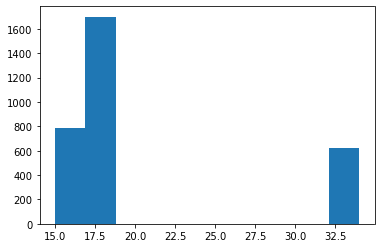

In [8]:
plt.hist(df.currentTime.diff().astype('timedelta64[ms]'));

This doesn't seem to be sampling at exactly 50hz, but it's close enough (I might need to look at this in more detail to see if I can make it a little more reliable, but ultimately as long as we have accurate time stamps and we're sampling relatively frequently we should be fine).

This gives us quite a lot of data, so we can roughly resample to data to make it more manageable. Here we just take every 10th sample.

In [9]:
df_resampled = df[::10]

## Take a look at the data

Now we can plot the data to check it looks OK.

In [10]:
df_resampled['yPos'] = 1 - df_resampled['yPos'] / 600  # Rescale and invert the position data

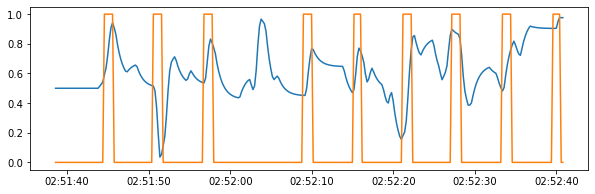

In [11]:
plt.figure(figsize=(10, 3))
plt.plot('currentTime', 'yPos', data=df_resampled, label='Player position')
plt.plot('currentTime', 'asteroidsPresent', data=df_resampled, label='Asteroids present')